<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/transfer_learning__feature_extraction_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import zipfile
#Downloaading file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2024-04-26 11:43:16--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M  22.3MB/s    in 8.2s    

2024-04-26 11:43:25 (19.6 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [18]:
#Unzipping file
with zipfile.ZipFile('/content/10_food_classes_10_percent.zip', 'r') as zip_ref:
  zip_ref.extractall()

(-0.5, 511.5, 511.5, -0.5)

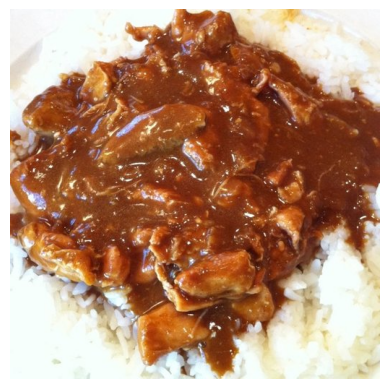

In [19]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/10_food_classes_10_percent/train/chicken_curry/1071242.jpg')
implot = plt.imshow(img)
plt.axis(False)

In [20]:
import os
for dirpath, dirnames, filenames in os.walk('/content/10_food_classes_10_percent'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in /content/10_food_classes_10_percent
there are 10 directories and 0 images in /content/10_food_classes_10_percent/test
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/sushi
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/steak
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/fried_rice
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/pizza
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/grilled_salmon
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/hamburger
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/ramen
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/chicken_wings
there are 0 directories and 250 images in /content/10_food_classes_10_percent/test/ice_cream
there are 0

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224))

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224))

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


<ipython-input-22-fb2bfef593f6>:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,n)


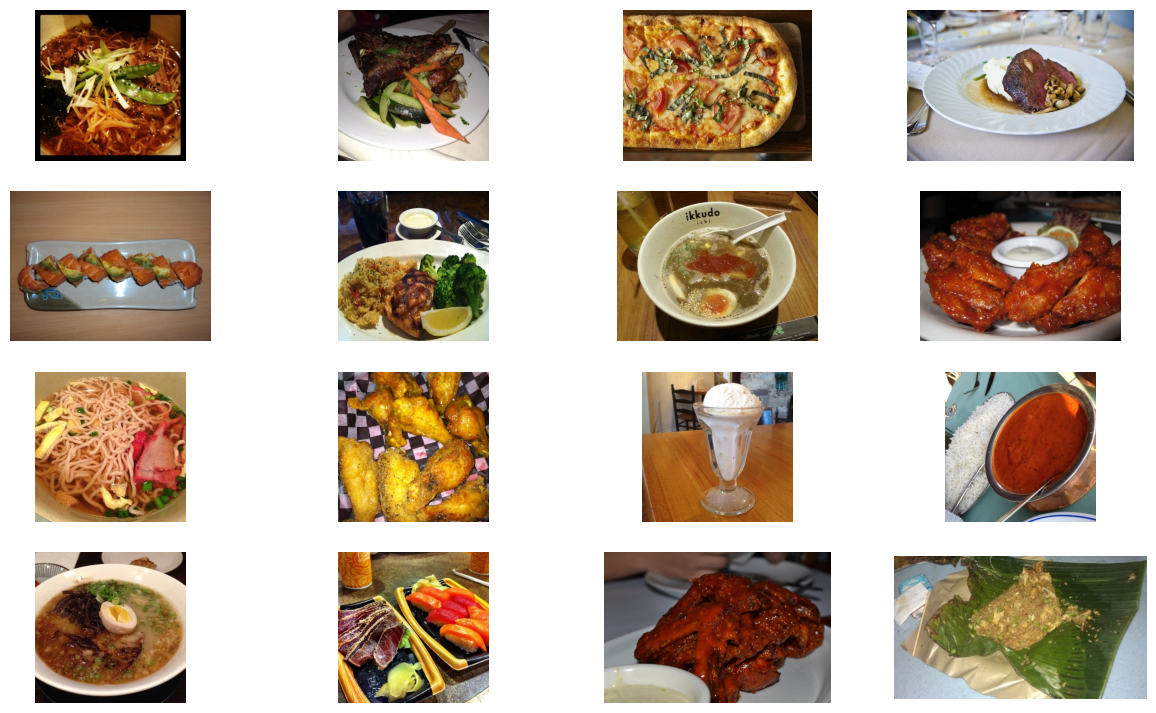

In [22]:
import random
from PIL import Image

images = []
for folder in os.listdir(train_dir):
  for image in os.listdir(train_dir + '/' + folder):
    images.append(os.path.join(train_dir, folder, image))

plt.figure(1, figsize=(15,9))
plt.axis('off')
n=0
for i in range(16):
  n+=1
  random_img = random.choice(images)
  imgs = mpimg.imread(random_img)
  plt.subplot(4,4,n)
  plt.axis('off')
  plt.imshow(imgs)

plt.show()

#transfer

In [23]:
efficientrel_url = "https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1"
resnet_url = "https://www.kaggle.com/models/google/resnet-v2/TensorFlow2/50-feature-vector/2"

In [24]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

IMAGE_SHAPE = (224,224)

def create_model(model_url, num_classes=10):
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable= False,
                                           name = 'Feature_ectraction_layer',
                                           input_shape = IMAGE_SHAPE + (3, ))

  model = tf.keras.Sequential([
      feature_extractor_layer,
      tf.keras.layers.Dense(num_classes, activation = 'softmax', name = "output_layer")
  ])

  return model

In [25]:
resnet_model = create_model(resnet_url,
                            num_classes = train_data.num_classes)

In [26]:
train_data.num_classes

10

In [27]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_ectraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [31]:
resnet_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [32]:
resnet_history = resnet_model.fit(train_data,
                                  batch_size=32,
                      epochs=8,
                      steps_per_epoch= len(train_data),
                      validation_data=valid_data,
                      validation_steps = len(valid_data))

Epoch 1/8
24/24 [==============================] - 23s 637ms/step - loss: 1.9364 - accuracy: 0.3600 - val_loss: 1.1856 - val_accuracy: 0.6160
Epoch 2/8
24/24 [==============================] - 11s 466ms/step - loss: 0.9079 - accuracy: 0.7240 - val_loss: 0.8243 - val_accuracy: 0.7416
Epoch 3/8
24/24 [==============================] - 13s 544ms/step - loss: 0.6118 - accuracy: 0.8173 - val_loss: 0.7238 - val_accuracy: 0.7644
Epoch 4/8
24/24 [==============================] - 13s 544ms/step - loss: 0.4704 - accuracy: 0.8827 - val_loss: 0.6951 - val_accuracy: 0.7724
Epoch 5/8
24/24 [==============================] - 11s 462ms/step - loss: 0.3844 - accuracy: 0.9147 - val_loss: 0.6631 - val_accuracy: 0.7808
Epoch 6/8
24/24 [==============================] - 13s 545ms/step - loss: 0.3057 - accuracy: 0.9400 - val_loss: 0.6467 - val_accuracy: 0.7860
Epoch 7/8
24/24 [==============================] - 11s 471ms/step - loss: 0.2579 - accuracy: 0.9573 - val_loss: 0.6259 - val_accuracy: 0.7972
Epoch 

In [33]:
resnet_model.evaluate(valid_data)

79/79 [==============================] - 9s 112ms/step - loss: 0.6281 - accuracy: 0.7900


[0.628068208694458, 0.7900000214576721]

In [34]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_ectraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [35]:
import pandas as pd
import numpy as np

In [29]:
def plot_loss_curvers(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  #plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

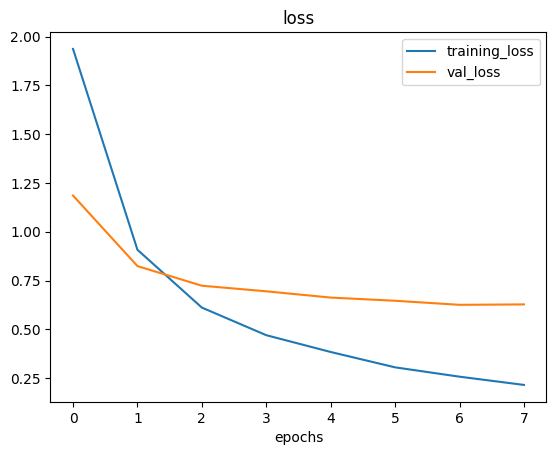

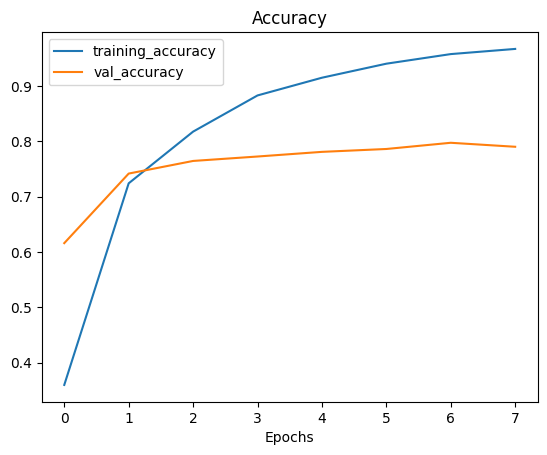

In [36]:
plot_loss_curvers(resnet_history)

In [37]:
efficientrel_model = create_model(efficientrel_url,num_classes = train_data.num_classes)

In [38]:
efficientrel_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [39]:
efficientrel_history = efficientrel_model.fit(train_data,
                                  batch_size=32,
                                  epochs=10,
                                  steps_per_epoch= len(train_data),
                                  validation_data=valid_data,
                                  validation_steps = len(valid_data))

Epoch 1/10
24/24 [==============================] - 23s 543ms/step - loss: 1.8861 - accuracy: 0.4160 - val_loss: 1.3292 - val_accuracy: 0.7060
Epoch 2/10
24/24 [==============================] - 10s 440ms/step - loss: 1.0793 - accuracy: 0.7667 - val_loss: 0.8862 - val_accuracy: 0.7964
Epoch 3/10
24/24 [==============================] - 12s 501ms/step - loss: 0.7635 - accuracy: 0.8387 - val_loss: 0.7131 - val_accuracy: 0.8308
Epoch 4/10
24/24 [==============================] - 13s 540ms/step - loss: 0.6120 - accuracy: 0.8587 - val_loss: 0.6224 - val_accuracy: 0.8440
Epoch 5/10
24/24 [==============================] - 10s 436ms/step - loss: 0.5189 - accuracy: 0.8800 - val_loss: 0.5660 - val_accuracy: 0.8544
Epoch 6/10
24/24 [==============================] - 13s 540ms/step - loss: 0.4497 - accuracy: 0.9027 - val_loss: 0.5290 - val_accuracy: 0.8592
Epoch 7/10
24/24 [==============================] - 11s 490ms/step - loss: 0.3953 - accuracy: 0.9093 - val_loss: 0.5020 - val_accuracy: 0.8632

In [41]:
efficientrel_model.evaluate(valid_data)

79/79 [==============================] - 8s 106ms/step - loss: 0.4494 - accuracy: 0.8700


[0.44935810565948486, 0.8700000047683716]

In [42]:
efficientrel_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Feature_ectraction_layer (  (None, 1280)              4049564   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4062374 (15.50 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 4049564 (15.45 MB)
_________________________________________________________________


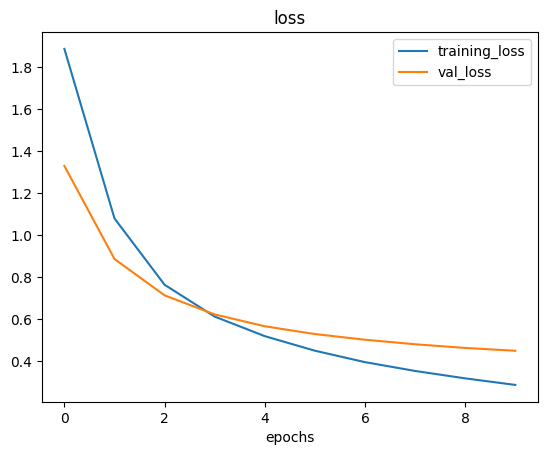

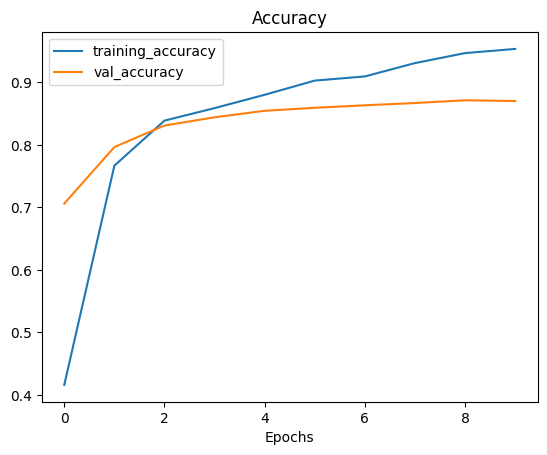

In [43]:
plot_loss_curvers(efficientrel_history)

In [44]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

import zipfile
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

--2024-04-26 12:18:06--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.170.207, 142.251.175.207, 74.125.24.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.170.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.3MB/s    in 23s     

2024-04-26 12:18:29 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

There are 2 directories and 0 images in 10_food_classes_all_data.
There are 10 directories and 0 images in 10_food_classes_all_data/test.
There are 0 directories and 250 images in 10_food_classes_all_data/test/sushi.
There are 0 directories and 250 images in 10_food_classes_all_data/test/steak.
There are 0 directories and 250 images in 10_food_classes_all_data/test/frie

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = '/content/10_food_classes_all_data/train'
test_dir = '/content/10_food_classes_all_data/test'

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224,224))

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [46]:
resnet_model_2 = create_model(resnet_url,
                             num_classes = train_data.num_classes)

In [47]:
resnet_model_2.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [48]:
resnet_history_2 = resnet_model_2.fit(train_data,
                                  batch_size=32,
                                  epochs=10,
                                  steps_per_epoch= len(train_data),
                                  validation_data=valid_data,
                                  validation_steps = len(valid_data))

Epoch 1/10
235/235 [==============================] - 43s 163ms/step - loss: 0.9123 - accuracy: 0.7068 - val_loss: 0.5346 - val_accuracy: 0.8168
Epoch 2/10
235/235 [==============================] - 37s 158ms/step - loss: 0.5410 - accuracy: 0.8239 - val_loss: 0.5005 - val_accuracy: 0.8284
Epoch 3/10
235/235 [==============================] - 54s 229ms/step - loss: 0.4403 - accuracy: 0.8535 - val_loss: 0.4900 - val_accuracy: 0.8340
Epoch 4/10
235/235 [==============================] - 34s 144ms/step - loss: 0.3704 - accuracy: 0.8796 - val_loss: 0.4821 - val_accuracy: 0.8444
Epoch 5/10
235/235 [==============================] - 35s 150ms/step - loss: 0.3221 - accuracy: 0.9005 - val_loss: 0.4717 - val_accuracy: 0.8432
Epoch 6/10
235/235 [==============================] - 39s 166ms/step - loss: 0.2850 - accuracy: 0.9149 - val_loss: 0.4727 - val_accuracy: 0.8448
Epoch 7/10
235/235 [==============================] - 36s 153ms/step - loss: 0.2505 - accuracy: 0.9261 - val_loss: 0.4697 - val_ac

In [49]:
resnet_model_2.evaluate(valid_data)

79/79 [==============================] - 9s 112ms/step - loss: 0.4952 - accuracy: 0.8448


[0.49519288539886475, 0.8447999954223633]

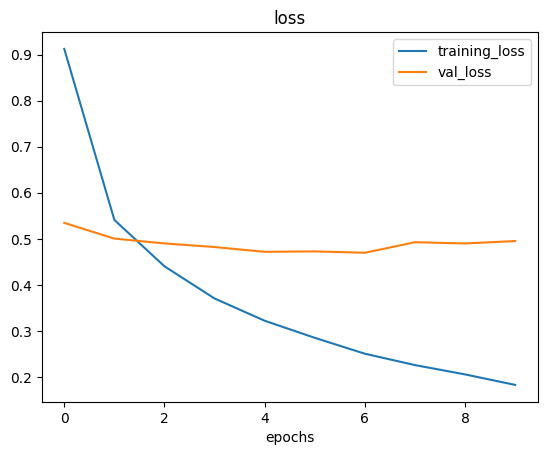

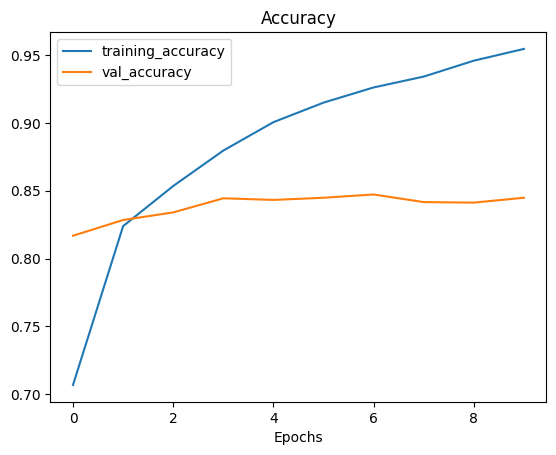

In [50]:
plot_loss_curvers(resnet_history_2)

In [51]:
efficientrel_model_2 = create_model(efficientrel_url,num_classes = train_data.num_classes)

In [53]:
efficientrel_model_2.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [54]:
efficientrel_history_2 = efficientrel_model_2.fit(train_data,
                                  batch_size=32,
                                  epochs=10,
                                  steps_per_epoch= len(train_data),
                                  validation_data=valid_data,
                                  validation_steps = len(valid_data))

Epoch 1/10
235/235 [==============================] - 51s 185ms/step - loss: 0.8178 - accuracy: 0.7705 - val_loss: 0.3994 - val_accuracy: 0.8960
Epoch 2/10
235/235 [==============================] - 31s 132ms/step - loss: 0.4474 - accuracy: 0.8639 - val_loss: 0.3310 - val_accuracy: 0.9048
Epoch 3/10
235/235 [==============================] - 33s 142ms/step - loss: 0.3754 - accuracy: 0.8853 - val_loss: 0.3029 - val_accuracy: 0.9096
Epoch 4/10
235/235 [==============================] - 50s 215ms/step - loss: 0.3314 - accuracy: 0.8984 - val_loss: 0.2906 - val_accuracy: 0.9108
Epoch 5/10
235/235 [==============================] - 32s 135ms/step - loss: 0.2980 - accuracy: 0.9093 - val_loss: 0.2797 - val_accuracy: 0.9132
Epoch 6/10
235/235 [==============================] - 32s 137ms/step - loss: 0.2703 - accuracy: 0.9235 - val_loss: 0.2741 - val_accuracy: 0.9112
Epoch 7/10
235/235 [==============================] - 32s 137ms/step - loss: 0.2502 - accuracy: 0.9267 - val_loss: 0.2669 - val_ac

In [55]:
efficientrel_model_2.evaluate(valid_data)

79/79 [==============================] - 8s 100ms/step - loss: 0.2644 - accuracy: 0.9176


[0.26442521810531616, 0.9175999760627747]

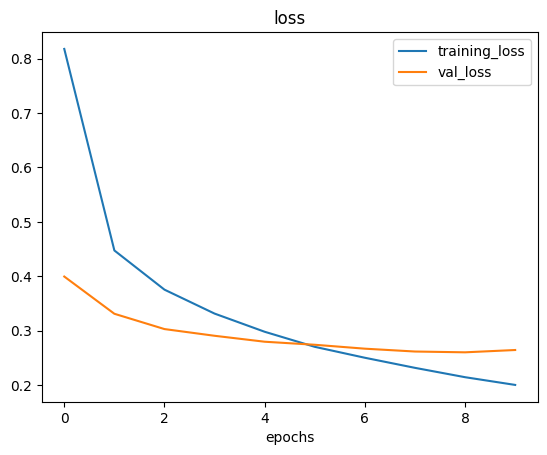

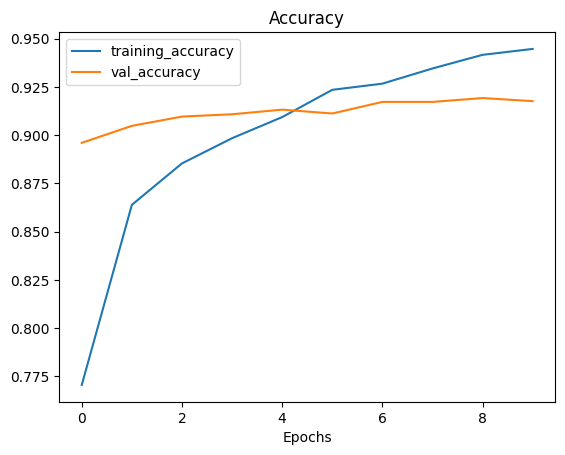

In [56]:
plot_loss_curvers(efficientrel_history_2)